# Face Mask Detection

The Dataset contains images of people wearing masks and people not wearing masks. The database contains 10000 colored images in the training folder, 800 images in the validation folder, and 992 images in the test folder.

##### task is to create a CNN model for identifying whether a person in the image is wearing a mask or not.

### Please perform the following tasks:

 - Create test, train, and validation directory variables
 - Create train and validation data generator with target size (128,128)
 - Train a CNN model
 - Train a model with VGG19 model
 - Use callbacks to save your model at every step
 - Training may take several hours, so use 5 to 10 epochs only

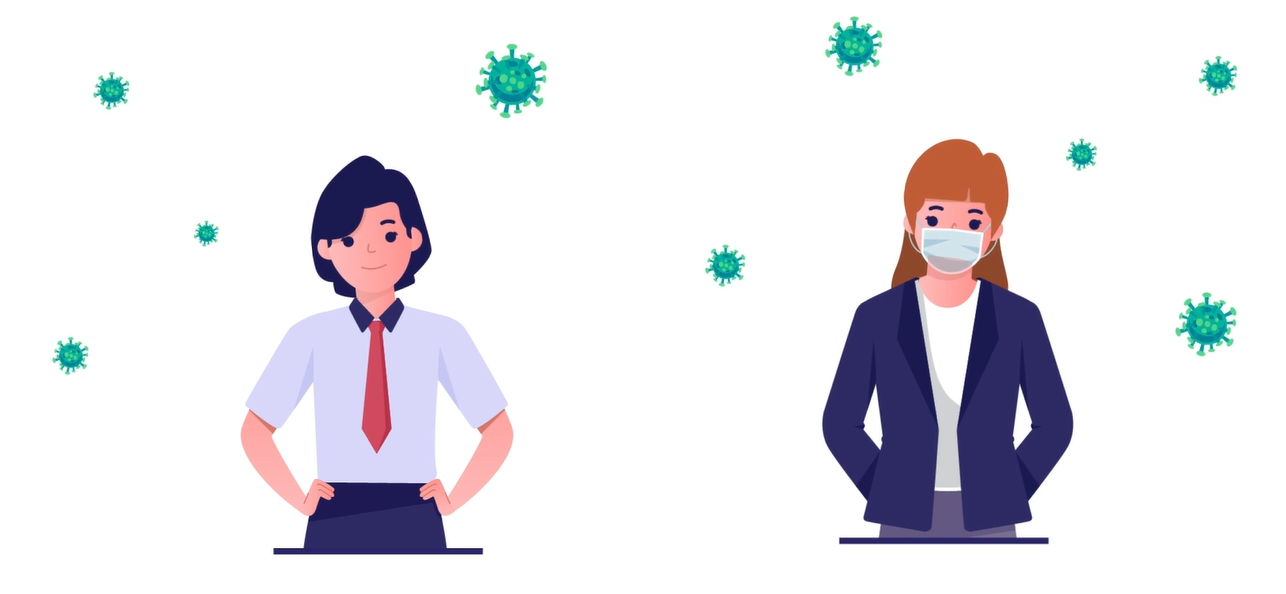

### With Mask

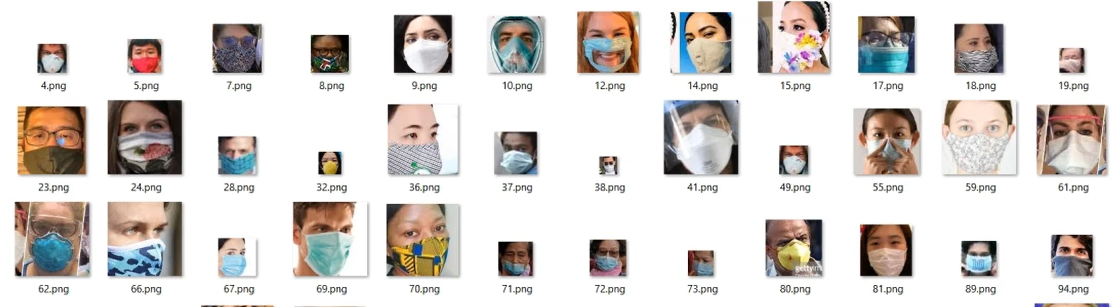

### Without Mask

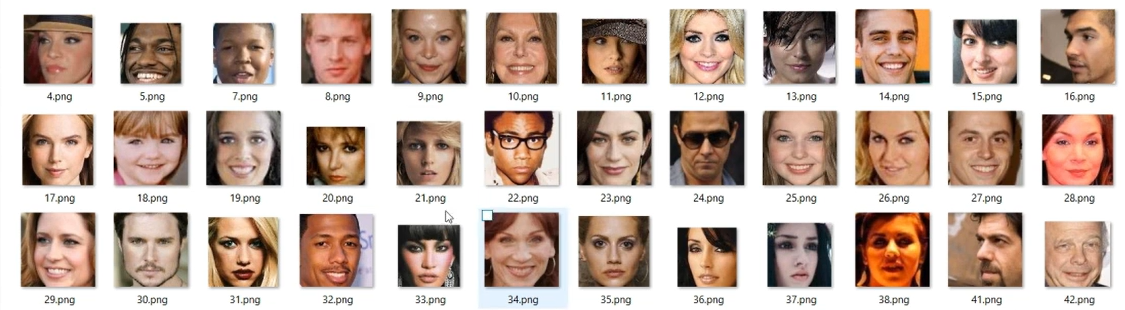

### Dataset

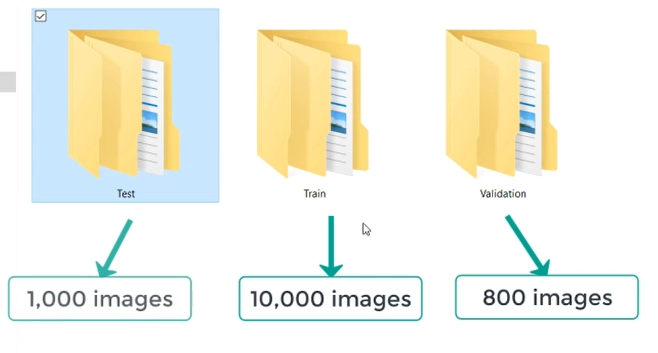

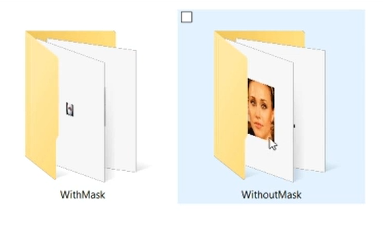

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'C:\Users\HP\Downloads\internshala - deep learning\Final_Assignment_Face Mask Dataset\Train'
validation_dir = r'C:\Users\HP\Downloads\internshala - deep learning\Final_Assignment_Face Mask Dataset\Validation'
test_dir = r'C:\Users\HP\Downloads\internshala - deep learning\Final_Assignment_Face Mask Dataset\Test'

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator has ability to perform - jpeg content to rgb grid of pixels ; conerting to floating point tensors ; 
# rescale pixel values of 0 to 255 to 0 and 1 interval

Link for Keras Image Preprocessing: https://keras.io/preprocessing/image/

In [5]:
# 2 parts of ImageDataGenerator:
# to get image
# rescale the image

# in this case want images to be fed directly from the directory/folder hence will be using --> flow_from_directory method

train_datagen = ImageDataGenerator(rescale=1./255) #RGB values getting divided by 255
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),  # size of the images as per requirement hence standardizing the images
        batch_size=20, # flow_from_directory will feed images in form of 20 batches to train_generator
        class_mode='binary') # providing information of content inside the folders -  2 folders hence binary

# output of train_generator will be in form of X & Y varriables
# Y varriables depend upon the name of the folders

# 20 images at a time to be fed inside fir function() while training model
# Advantage of using ImageDataGenerator --> incase want augmented data can apply many more functions like 
# rescale, zoom, shear etc to generate more data from exsisiting data

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Structure of CNN Model
 -  4 different conv layers with max pooling and the dense layer and output neuron.

## Structure of CNN Model

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()

# CNN

# first conv layer with fiter 32 and a window of 3x3 and input size=128x128x3, RGB vimages hence 3rd dimension as 3
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 3)))
# max pooling layer of window 2x2
model.add(layers.MaxPooling2D((2, 2)))

# second conv layer with fiter 64 and a window of 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# max pooling layer of window 2x2
model.add(layers.MaxPooling2D((2, 2)))

# third conv layer with fiter 128 and a window of 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# max pooling layer of window 2x2
model.add(layers.MaxPooling2D((2, 2)))

# fourth conv layer with fiter 128 and a window of 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# max pooling layer of window 2x2
model.add(layers.MaxPooling2D((2, 2)))

# ANN

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu')) # single dense layer of 512 neurons

model.add(layers.Dense(1, activation='sigmoid')) # single output layer with 1 neuron as want to predict either of the class

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4), # RMS prop has advamtage over sgd while performing image processing
              metrics=['acc'])

In [10]:
history = model.fit(
      train_generator, # generating data continuously
      steps_per_epoch=500, # stopping point --> train dataset of 10000 images and batch_size of 20  hence steps_per_epoch=500
      epochs=5, #20
      validation_data=validation_generator,
      validation_steps=40) # validation dataset of 800 images and batch_size of 20  hence validation_steps=40

Epoch 1/5
500/500 [==============================] - 245s 486ms/step - loss: 0.1679 - acc: 0.9333 - val_loss: 0.0511 - val_acc: 0.9837
Epoch 2/5
500/500 [==============================] - 224s 447ms/step - loss: 0.0527 - acc: 0.9817 - val_loss: 0.0483 - val_acc: 0.9812
Epoch 3/5
500/500 [==============================] - 224s 448ms/step - loss: 0.0358 - acc: 0.9884 - val_loss: 0.0132 - val_acc: 0.9950
Epoch 4/5
500/500 [==============================] - 223s 446ms/step - loss: 0.0253 - acc: 0.9917 - val_loss: 0.0196 - val_acc: 0.9925
Epoch 5/5
500/500 [==============================] - 228s 455ms/step - loss: 0.0237 - acc: 0.9925 - val_loss: 0.0259 - val_acc: 0.9875


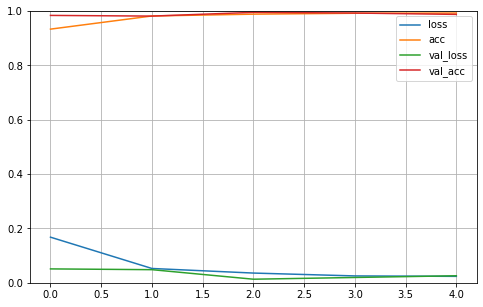

In [11]:
# validation_accuracy is somehwhat close to 98%

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
# there is no such  difference between training_acc and validation_acc
# val_acc oscilating around 98%
# train_acc oscilating around 99% and increasing with each epoch

# this graph shows there is no Overfitting in the model

#### Visualization of Image

Found 10000 files belonging to 2 classes.


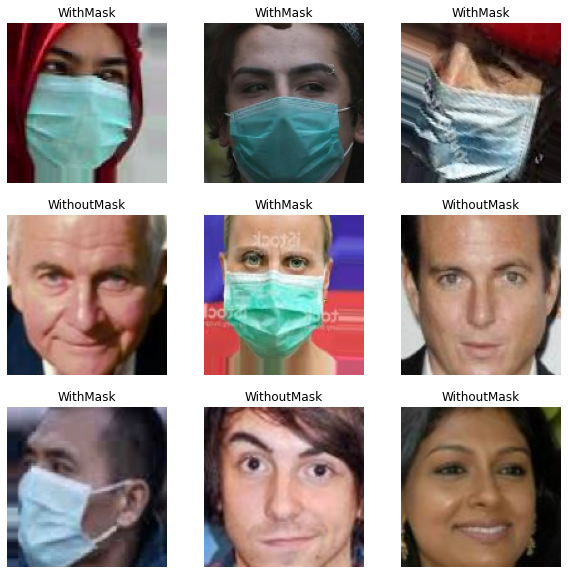

In [13]:
import pathlib

data_dir_train = pathlib.Path('C:/Users/HP/Downloads/internshala - deep learning/Final_Assignment_Face Mask Dataset/Train/')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels='inferred', batch_size= 20, 
                                                               image_size=(128,128), shuffle=True, seed=123, 
                                                               interpolation='bilinear', 
                                                               follow_links=False)
class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
model.save("SimpleCNNModel_FaceDetection.h5")

In [15]:
del model

In [16]:
keras.backend.clear_session()

In [5]:
simple_model = keras.models.load_model("SimpleCNNModel_FaceDetection.h5")

In [6]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(128, 128),batch_size=20,class_mode='binary')

Found 992 images belonging to 2 classes.


In [12]:
simple_model.evaluate(test_generator, steps=50) # steps = testset/batch_size

50/50 [==============================] - 9s 182ms/step - loss: 0.0437 - acc: 0.9879


[0.043746478855609894, 0.9879032373428345]

#### Simple CNN - Face Detection Mask Acc : 0.9879